Loom Video:

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [29]:
# Loading in the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=columns)

# Displaying the first few rows of my dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Task 1:

ANOVA F-statistic: 119.26450218450468, p-value: 1.6696691907693826e-31


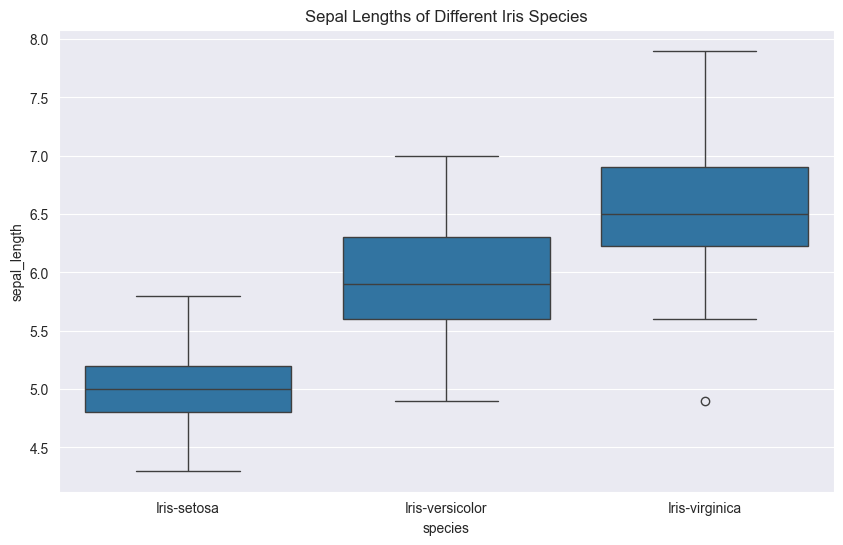

In [30]:
# Conducting ANOVA
anova_result = stats.f_oneway(
    iris[iris['species'] == 'Iris-setosa']['sepal_length'],
    iris[iris['species'] == 'Iris-versicolor']['sepal_length'],
    iris[iris['species'] == 'Iris-virginica']['sepal_length']
)

# Displaying my results
print(f"ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.title('Sepal Lengths of Different Iris Species')
plt.show()

Task 2:

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     233.1
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           6.15e-49
Time:                        14:34:59   Log-Likelihood:                -29.519
No. Observations:                 120   AIC:                             67.04
Df Residuals:                     116   BIC:                             78.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7399      0.275      6.319   

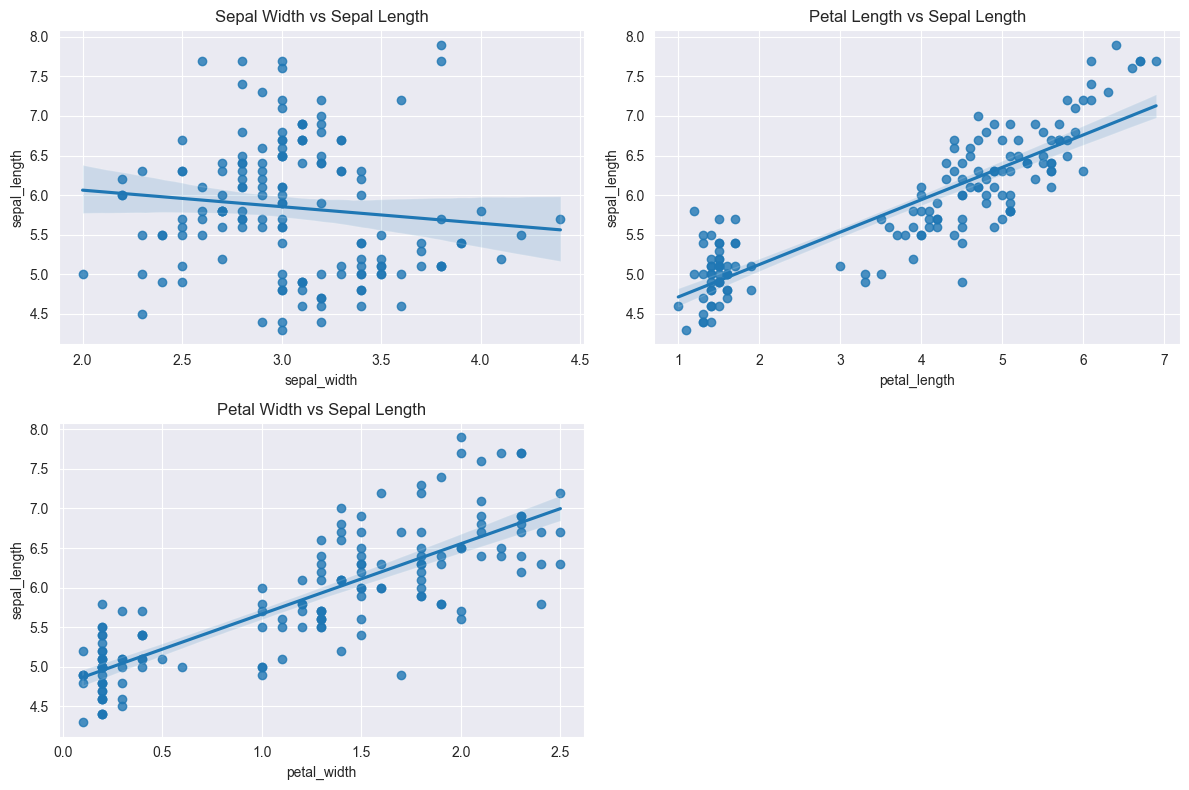

In [31]:
# Define the independent variables and the dependent variable
X = iris[['sepal_width', 'petal_length', 'petal_width']]
y = iris['sepal_length']

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the model summary
print(model.summary())

# Display the model summary
model_summary = model.summary()
print(model_summary)

# Create scatter plots with regression lines
plt.figure(figsize=(12, 8))

# Sepal Width vs Sepal Length
plt.subplot(2, 2, 1)
sns.regplot(x='sepal_width', y='sepal_length', data=iris)
plt.title('Sepal Width vs Sepal Length')

# Petal Length vs Sepal Length
plt.subplot(2, 2, 2)
sns.regplot(x='petal_length', y='sepal_length', data=iris)
plt.title('Petal Length vs Sepal Length')

# Petal Width vs Sepal Length
plt.subplot(2, 2, 3)
sns.regplot(x='petal_width', y='sepal_length', data=iris)
plt.title('Petal Width vs Sepal Length')

plt.tight_layout()
plt.show()

Task 3: ANOVA and linear models have important rules that, if broken, can mess up the results. For ANOVA, the data points must be independent, the groups must follow a normal distribution, and the groups must have similar variances. If these rules are broken, the results can be wrong. For linear models, the relationship must be linear, errors should be independent and have constant variance, errors should follow a normal distribution, and the predictors shouldn't be too closely related. Breaking these rules can lead to incorrect or inefficient results. We can fix these issues by using randomization, transforming the data, and checking for closely related predictors. In Python, we can use `statsmodels` and `scikit-learn` to help diagnose and fix these problems, ensuring our analysis is accurate.

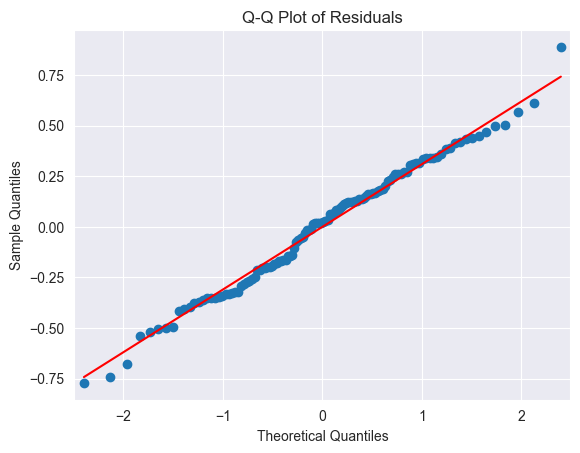

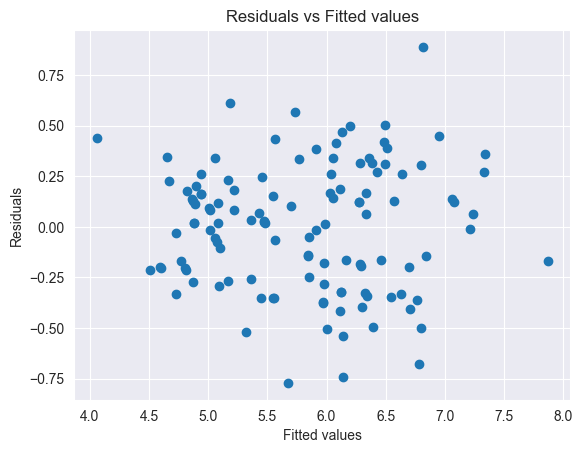

        feature        VIF
0         const  95.482351
1   sepal_width   1.263843
2  petal_length  15.091612
3   petal_width  14.232148
                                 OLS Regression Results                                
Dep. Variable:           sepal_length   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.6650
Date:                Wed, 03 Jul 2024   Prob (F-statistic):                       0.575
Time:                        14:35:01   Log-Likelihood:                         -381.58
No. Observations:                 120   AIC:                                      769.2
Df Residuals:                     117   BIC:                                      777.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                    

/Users/kanetoomer/miniconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [32]:
# Define the independent variables and the dependent variable
X = iris[['sepal_width', 'petal_length', 'petal_width']]
y = iris['sepal_length']

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Normality of Residuals: Q-Q plot
sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Homoscedasticity: Plot residuals vs fitted values
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Multicollinearity: Check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Transforming Data to handle normality
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X_train)
model_transformed = sm.OLS(y_train, X_transformed).fit()

# Display the model summary for transformed data
print(model_transformed.summary())

Task 4: 

Problem Description:
The Iris dataset contains measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers: Iris-setosa, Iris-versicolor, and Iris-virginica. Our goal is to understand the differences in sepal length across these species and build a predictive model to estimate sepal length based on other features.

Research Question:

1. Is there a significant difference in sepal length among the three species of iris?
2. Can we build a linear model to predict sepal length based on sepal width, petal length, and petal width?

Limitations & Assumptions:
ANOVA and linear models have important rules that need to be followed to get correct results. For ANOVA, these rules include having independent observations, normal distribution of the dependent variable within each group, and equal variances across groups. If these rules are broken, the results might be wrong. For linear models, the rules are having a linear relationship between variables, independent residuals (errors), constant variance of residuals, normal distribution of residuals, and no high correlation between independent variables. If these rules are broken, the estimates might be biased or inefficient. To fix these issues, we can transform the data to meet normality and variance requirements, check for and handle multicollinearity using Variance Inflation Factor (VIF), and ensure the data is collected properly to maintain independence. Using these solutions in Python helps make the analysis more reliable.

Conclusion:
In this project, we looked at the Iris dataset to see how sepal length varies among three species of iris flowers and to build a model to predict sepal length. Our ANOVA analysis showed that there are significant differences in sepal length between the species, meaning species type affects sepal length. The linear regression model revealed that sepal width, petal length, and petal width are good predictors of sepal length, explaining a lot of its variation. We also made sure to check and fix any issues with the assumptions of our models to keep our results reliable. These findings help in understanding and classifying iris species and show how useful linear models are in making predictions from data. This work can be helpful for botanical studies and research.

ANOVA F-statistic: 119.26450218450468, p-value: 1.6696691907693826e-31


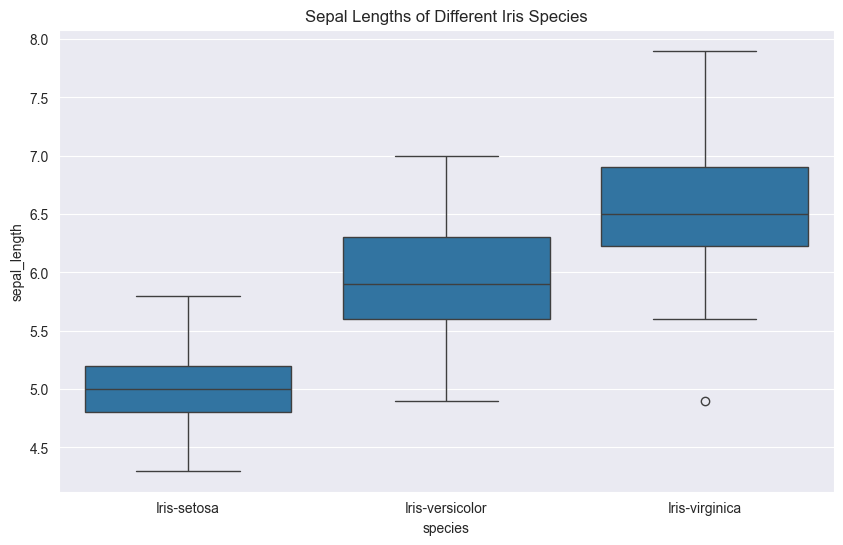

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     233.1
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           6.15e-49
Time:                        14:35:02   Log-Likelihood:                -29.519
No. Observations:                 120   AIC:                             67.04
Df Residuals:                     116   BIC:                             78.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7399      0.275      6.319   

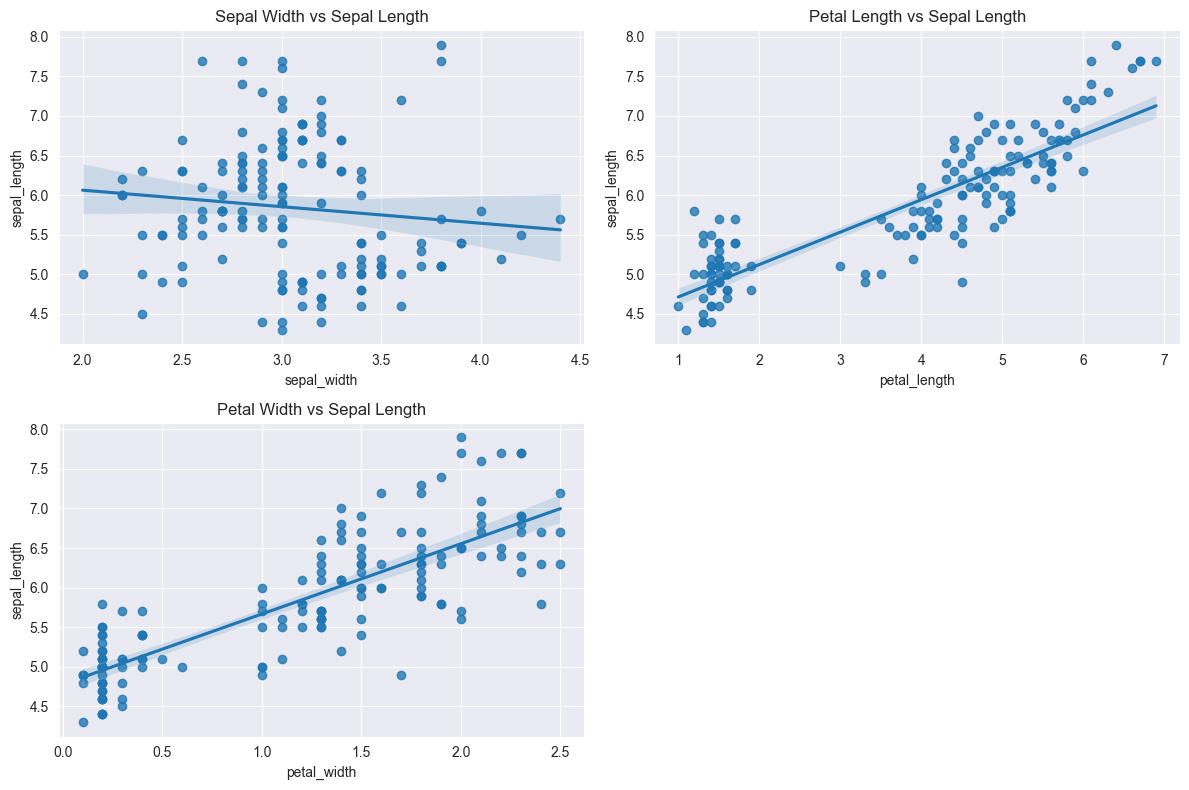

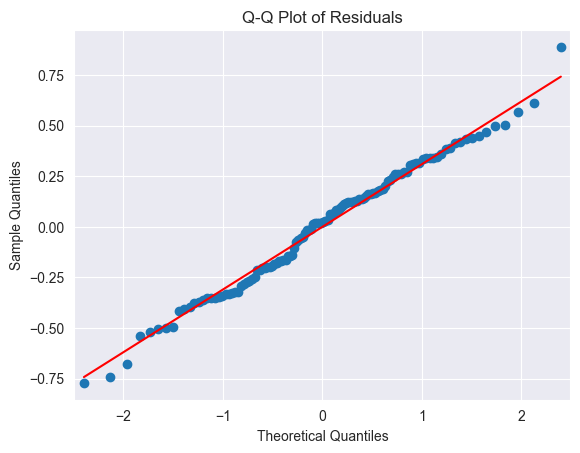

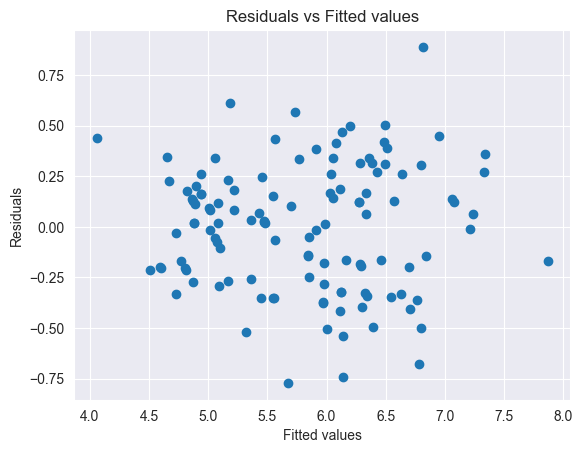

                                 OLS Regression Results                                
Dep. Variable:           sepal_length   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.6650
Date:                Wed, 03 Jul 2024   Prob (F-statistic):                       0.575
Time:                        14:35:03   Log-Likelihood:                         -381.58
No. Observations:                 120   AIC:                                      769.2
Df Residuals:                     117   BIC:                                      777.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/kanetoomer/miniconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [33]:
# Conduct ANOVA
anova_result = stats.f_oneway(
    iris[iris['species'] == 'Iris-setosa']['sepal_length'],
    iris[iris['species'] == 'Iris-versicolor']['sepal_length'],
    iris[iris['species'] == 'Iris-virginica']['sepal_length']
)
print(f"ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Box plot to visualize the differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.title('Sepal Lengths of Different Iris Species')
plt.show()

# Define the independent variables and the dependent variable
X = iris[['sepal_width', 'petal_length', 'petal_width']]
y = iris['sepal_length']

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the model summary
print(model.summary())

# Check VIF for multicollinearity
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_data = calculate_vif(X_train)
print(vif_data)

# Visualizations for linear regression
plt.figure(figsize=(12, 8))

# Sepal Width vs Sepal Length
plt.subplot(2, 2, 1)
sns.regplot(x='sepal_width', y='sepal_length', data=iris)
plt.title('Sepal Width vs Sepal Length')

# Petal Length vs Sepal Length
plt.subplot(2, 2, 2)
sns.regplot(x='petal_length', y='sepal_length', data=iris)
plt.title('Petal Length vs Sepal Length')

# Petal Width vs Sepal Length
plt.subplot(2, 2, 3)
sns.regplot(x='petal_width', y='sepal_length', data=iris)
plt.title('Petal Width vs Sepal Length')

plt.tight_layout()
plt.show()

# Normality of Residuals: Q-Q plot
sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Homoscedasticity: Plot residuals vs fitted values
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Transforming Data to handle normality
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X_train)
model_transformed = sm.OLS(y_train, X_transformed).fit()

# Display the model summary for transformed data
print(model_transformed.summary())